## NAMITHA MURUGESH

## TASK 6 GRIP

### Prediction using Decision Tree

Algorithm  (Level - Intermediate)

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

## Load the Data

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

In [3]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Preparing the data

In [4]:
# Putting feature variable to X
X = df


In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Putting response variable to y
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
np.unique(y)

array([0, 1, 2])

###### Observation
There are 3 classes in the output

In [8]:
# Basic information abouth data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


###### Observation 
There are 150 non null rows of data

## Split the data into train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Splitting the data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

## Build the model with Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

##### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [12]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
!pip install six

In [14]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

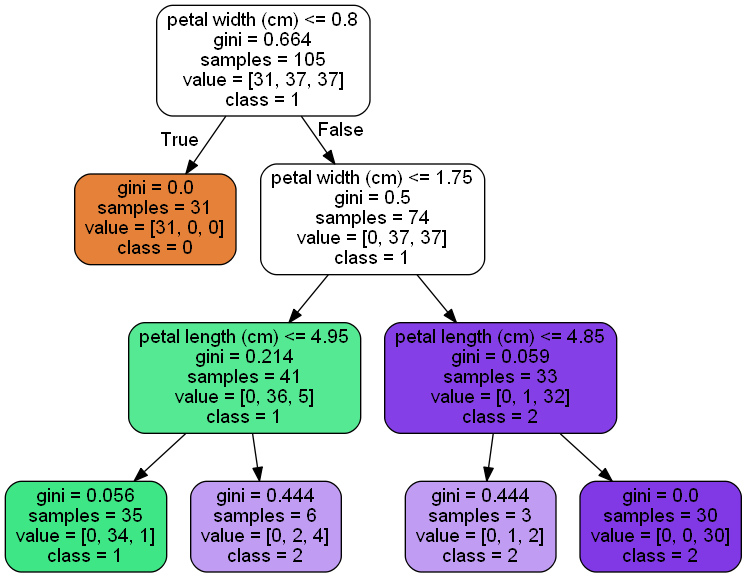

In [15]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=["0","1","2"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## Evaluating model performance

In [16]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9619047619047619


array([[31,  0,  0],
       [ 0, 34,  3],
       [ 0,  1, 36]], dtype=int64)

In [19]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)